<a href="https://colab.research.google.com/github/HedersonSantos/jpx_tokyo/blob/main/jpx_tokyo_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import io, re, os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#import jpx_tokyo_market_prediction

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
rom sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [ ]:
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/
path = '/gdrive/My Drive/Colab Notebooks'


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks


In [ ]:
dados = pd.read_csv('stock_prices.csv')
dados.head(3)

,RowId,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
Date,,,,,,,,,,,
2017-01-04,20170104_1301,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.0,False,0.000730
2017-01-04,20170104_7412,7412,719.0,725.0,719.0,721.0,201400,1.0,0.0,False,0.000000
2017-01-04,20170104_7408,7408,2459.0,2518.0,2447.0,2500.0,110900,1.0,0.0,False,0.004421


In [ ]:
colunas=['Open','High','Low','Close','Volume']
alvo=['Target']
dados = dados[~dados['Target'].isna()]
dados = dados[~dados['Open'].isna()]
dados = dados[dados['Date']>='2021-01-01 00:00:00']
print(dados.shape)


(4000, 11)


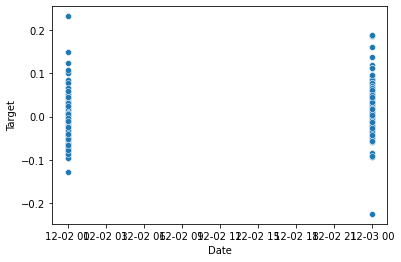

In [ ]:
sns.scatterplot( x=dados.index, y=dados.Target)


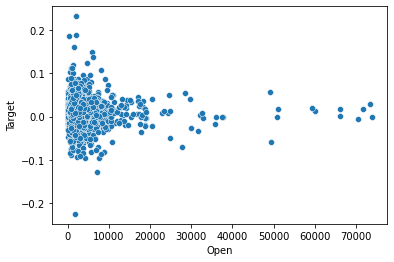

In [ ]:
#sns.pairplot(dados[(','.join(colunas) + ',Target').split(',')])
#plt.show()
sns.scatterplot( x=dados.Open, y=dados.Target)


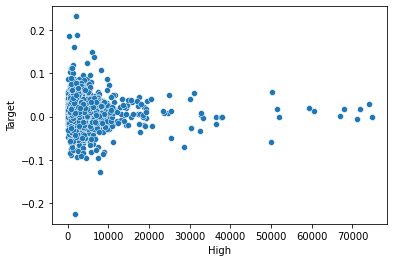

In [ ]:
sns.scatterplot( x=dados.High, y=dados.Target)

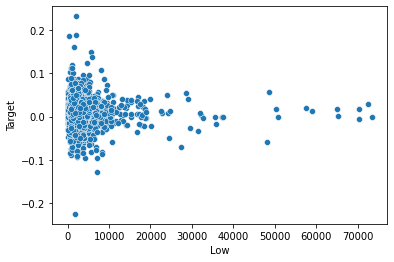

In [ ]:
sns.scatterplot( x=dados.Low, y=dados.Target)

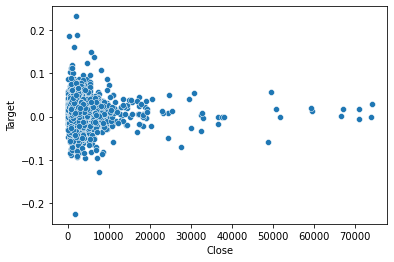

In [ ]:
sns.scatterplot( x=dados.Close, y=dados.Target)

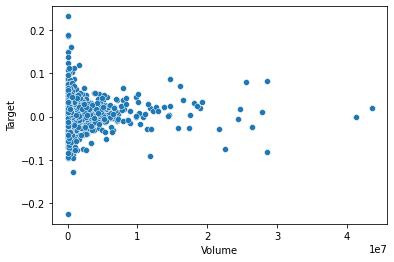

In [ ]:
sns.scatterplot( x=dados.Volume, y=dados.Target)

In [ ]:
dados[colunas].corr('pearson')

,Open,High,Low,Close,Volume
Open,1.000000,0.999889,0.999908,0.999800,-0.021655
High,0.999889,1.000000,0.999860,0.999906,-0.021059
Low,0.999908,0.999860,1.000000,0.999878,-0.022447
Close,0.999800,0.999906,0.999878,1.000000,-0.021337
Volume,-0.021655,-0.021059,-0.022447,-0.021337,1.000000


In [ ]:
X = dados[colunas]
y = dados[alvo].map(lambda x: np.log(x+ 0.01))
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)
X_treino.shape, X_teste.shape

['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
pca_proj=PCA(n_components=2)
X_2d=pca_proj.fit_transform(X_treino)
X_teste2d = pca_proj.fit_transform(X_teste)

plt.scatter(data_2d[:,0],data_2d[:,1])